In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Admission_Predict.csv')

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [18]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Checking for any missing values 

In [10]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [27]:
from scipy import stats

In [28]:
z=np.abs(stats.zscore(df))
z

array([[1.76210664, 1.74697064, 0.79882862, ..., 1.76481828, 0.90911166,
        1.37364801],
       [0.62765641, 0.06763531, 0.79882862, ..., 0.45515126, 0.90911166,
        0.25029671],
       [0.07046681, 0.56252785, 0.07660001, ..., 1.00563118, 0.90911166,
        0.03054111],
       ...,
       [1.15124883, 1.41704229, 0.79882862, ..., 1.42900622, 0.90911166,
        1.30343855],
       [0.41952842, 0.72749202, 0.07660001, ..., 0.30403584, 1.09997489,
        0.38158839],
       [1.41304503, 1.58200646, 0.79882862, ..., 1.78160888, 0.90911166,
        1.58427637]])

In [29]:
threshold=3
np.where(z>threshold)

(array([58], dtype=int64), array([5], dtype=int64))

In [31]:
dataset_no_outliers=df[(z<3).all(axis=1)]
dataset_no_outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [34]:
X=df.iloc[:,:-1].values
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [36]:
Y=df.iloc[:,-1].values
Y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
X_train.shape

(320, 7)

In [40]:
X_test.shape

(80, 7)

In [41]:
Y_train.shape

(320,)

In [42]:
Y_test.shape

(80,)

Checking for any correlation between x and Y

<AxesSubplot:>

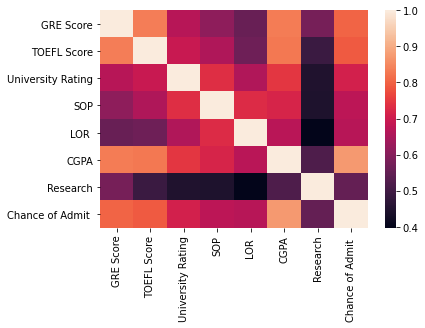

In [43]:
import seaborn as sns
sns.heatmap(df.corr())

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
mr=LinearRegression()
mr.fit(X_train,Y_train)

LinearRegression()

In [54]:
y_pred=mr.predict(X_test)
y_pred

array([0.69791327, 0.69343926, 0.77882728, 0.61577391, 0.72281999,
       0.60286273, 0.7067783 , 0.64104331, 0.87037545, 0.91874738,
       0.53830841, 0.88537227, 0.70839345, 0.45744365, 0.85464724,
       0.62329657, 0.63034415, 0.81411912, 0.58479826, 0.73198733,
       0.8755188 , 0.8436008 , 0.65964574, 0.45723204, 0.78390781,
       0.58302231, 0.49932541, 0.64153708, 0.88778116, 0.64950902,
       0.64065401, 0.74057509, 0.74268991, 0.55702869, 0.78303581,
       0.77159575, 0.65140153, 0.86244822, 0.63038997, 0.92925287,
       0.72728695, 0.67164181, 0.70967833, 0.80792068, 0.8242496 ,
       0.6540426 , 0.56311848, 0.69211512, 0.60750179, 0.60172386,
       0.67514274, 0.80138513, 0.65205933, 0.87968402, 0.72302425,
       0.75457701, 0.70602419, 0.73465988, 0.75784394, 0.82956036,
       0.77359675, 0.47343091, 0.63752277, 0.52286953, 0.84258874,
       0.82142312, 0.73664582, 0.86699812, 0.76933952, 0.75453984,
       0.59900479, 0.82915301, 0.82822468, 0.60736795, 0.93236

In [56]:
Y_test

array([0.71, 0.7 , 0.79, 0.73, 0.72, 0.48, 0.77, 0.71, 0.9 , 0.94, 0.58,
       0.89, 0.72, 0.57, 0.78, 0.42, 0.64, 0.84, 0.63, 0.72, 0.9 , 0.83,
       0.57, 0.47, 0.85, 0.67, 0.44, 0.54, 0.92, 0.62, 0.68, 0.73, 0.73,
       0.61, 0.55, 0.74, 0.64, 0.89, 0.73, 0.95, 0.71, 0.72, 0.75, 0.76,
       0.86, 0.7 , 0.39, 0.79, 0.61, 0.64, 0.71, 0.8 , 0.61, 0.89, 0.68,
       0.79, 0.78, 0.52, 0.76, 0.88, 0.74, 0.49, 0.65, 0.59, 0.87, 0.89,
       0.81, 0.9 , 0.8 , 0.76, 0.68, 0.87, 0.68, 0.64, 0.91, 0.61, 0.69,
       0.62, 0.93, 0.43])

In [59]:
prediction = pd.DataFrame({'Y (Test)': Y_test, 'Y (Predicted)': y_pred})
prediction.head()

,Y (Test),Y (Predicted)
0,0.71,0.697913
1,0.70,0.693439
2,0.79,0.778827
3,0.73,0.615774
4,0.72,0.722820


In [60]:
from sklearn.metrics import r2_score      #AS been observed we don't get too much accuracy on applying multilinear regression
r2_score(Y_test,y_pred)

0.7355078738145218

In [72]:
mr.predict([[332, 114, 3, 4.7,3.5,9.7,0.01]])

array([0.88665334])